# Team members:
* David Hiltzman
* Jianting Liu
* Godwin Bime
* Yining Wang
## Team project for Team #03 DS620

In [1]:
#   Import libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.datasets import mnist
import tensorflow as tf

In [2]:
#   import the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#   Get the shape of the dataset
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


##  Visualize the dataset

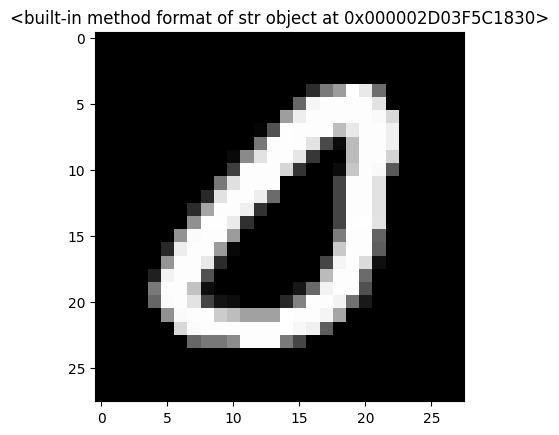

In [4]:
rand_img = np.random.randint(0, 1000)

#   Display random image in the training dataset
plt.title('laabel: {}'.format)
plt.imshow(x_train[rand_img], cmap='gray')

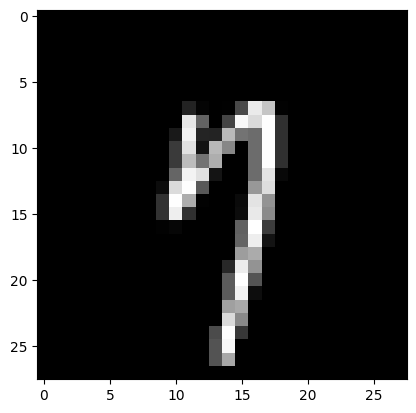

In [5]:
#   Display random image in the testing dataset
plt.imshow(x_test[rand_img], cmap='gray')


In [6]:
#   print five images from training and testing datasets
def print_sample_images(img_source):
    num_classes = 5
    fig, ax = plt.subplots(1, num_classes, figsize=(20, 20)) #  1 row 5 columns
    if img_source == 'train':
         print("From Training dataset")
    elif img_source == 'train':
         print("From testing dataset")
    else:
         print("Wrong data readings...")

    for i in range(num_classes):
        if img_source == 'train':
            sample_img = x_train[y_train == i][0]
        elif img_source == 'test':
                sample_img = x_test[y_test == i][0]
        else:
             print("ERROR: Must be dataset from training and testing dataframes")
             break

        ax[i].imshow(sample_img, cmap='gray')
        ax[i].set_title(f'Label: {i}')
    


From Training dataset


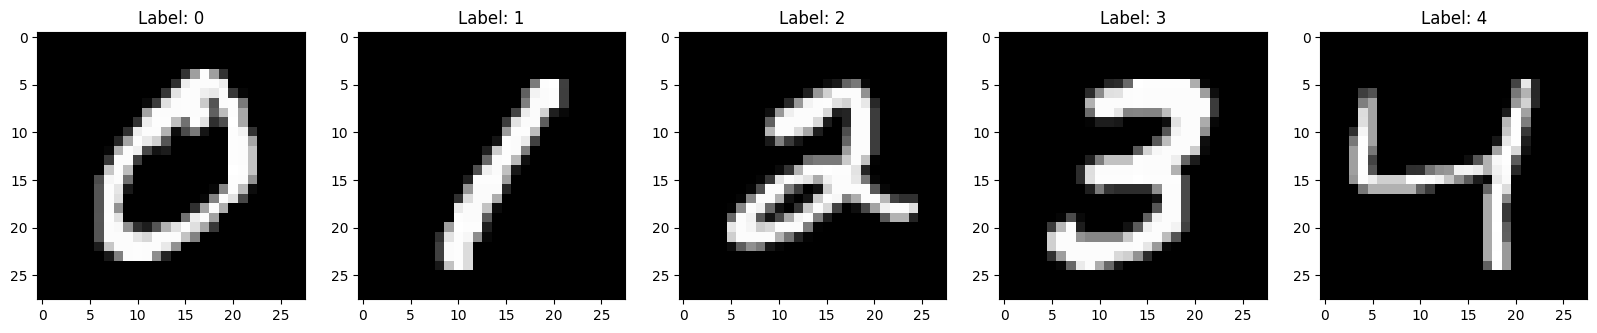

In [7]:
print_sample_images('train')

Wrong data readings...


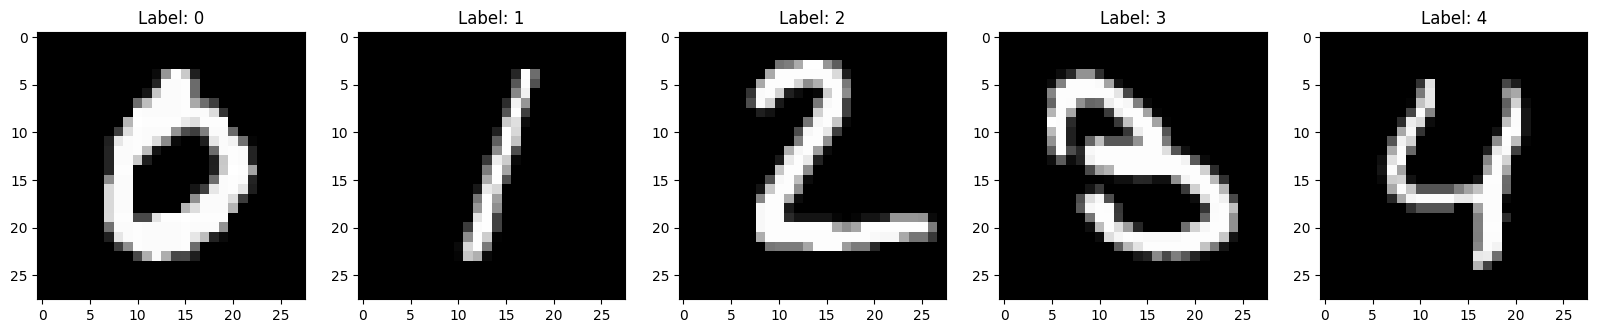

In [8]:
print_sample_images('test')

## Preprocess the dataset

In [9]:
#   convert label classes to categories using one-hot encoder
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
#   Reshape data to a vector
# x_train = x_train.reshape(x_train.shape[0], -1)
# x_test = x_test.reshape(x_test.shape[0], -1)

In [12]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
# feature scaling
x_train = x_train / 255.0
x_test = x_test / 255.0

##  Build the model

In [15]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [16]:
#   Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [20]:
#   compile the model
# loss_function = tf.keras.losses.BinaryCrossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [32]:
history = model.fit(x_train, y_train, epochs=10, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.0503 - val_accuracy: 0.9884
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0540 - val_accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0432 - val_accuracy: 0.9913
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0388 - val_accuracy: 0.9921
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.0317 - val_accuracy: 0.9923
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0472 - val_accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.0397 - val_ac

## Evaluate model

In [33]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0687 - accuracy: 0.9892


In [34]:
print("Test accuracy: %.3f%%" % (test_acc * 100))

Test accuracy: 98.920%


### Accuracy and loss

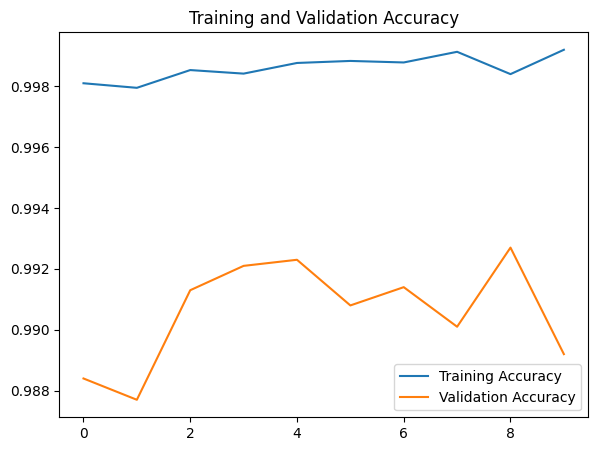

In [35]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

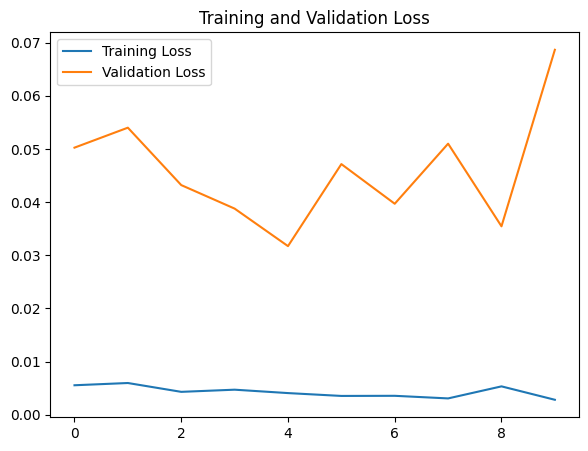

In [38]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

## Predict values

In [40]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 3ms/step


In [41]:
print(f'Prediction: {y_pred}')
print(f'Actual result: {y_pred_classes}')

Prediction: [[5.4663647e-27 1.0405850e-16 9.4939737e-28 ... 1.0000000e+00
  1.6856848e-21 1.7342555e-17]
 [2.6165029e-21 1.6950321e-13 1.0000000e+00 ... 4.6924193e-22
  1.2217646e-27 3.6623730e-22]
 [1.6801766e-21 1.0000000e+00 1.4522771e-19 ... 2.7597501e-16
  7.7894301e-17 5.3723319e-17]
 ...
 [7.0207049e-31 2.9457271e-17 1.1033794e-22 ... 2.1372622e-22
  1.2683627e-18 2.6975109e-21]
 [3.8443556e-14 3.3062804e-30 3.1413391e-31 ... 5.5238151e-22
  4.1891893e-10 5.0367167e-19]
 [5.6378840e-20 1.8030562e-19 1.2323245e-19 ... 7.9103510e-31
  1.1778255e-22 5.0955004e-21]]
Actual result: [7 2 1 ... 4 5 6]


In [59]:
# choose a random sample from all the test data
y_true = np.argmax(y_test, axis=1)
def get_random_sample():
    ran_num = np.random.choice(len(x_test))
    x_sample = x_test[ran_num]
    y_sample_true = y_true[ran_num]

    y_sample_pred_class = y_pred_classes[ran_num]
    return x_sample, y_sample_true, y_sample_pred_class

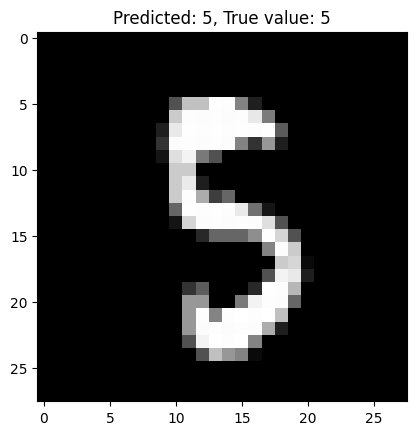

In [60]:
#   Visualize results
x_sample, y_sample_true, y_sample_pred_class = get_random_sample()
plt.title(f'Predicted: {y_sample_pred_class}, True value: {y_sample_true}')
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

## Confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

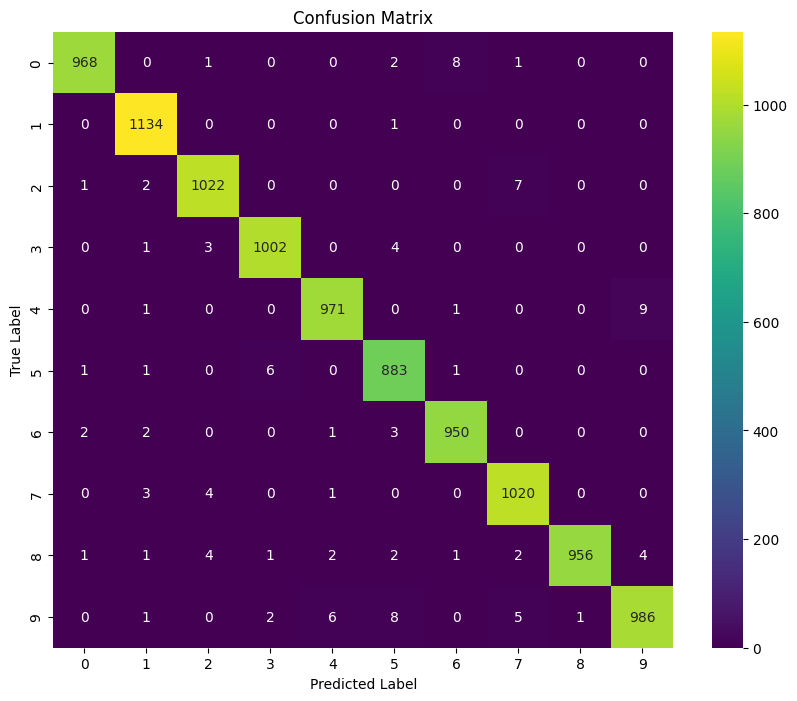

In [61]:
conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred_classes)

#   Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", ax=ax, cmap="viridis")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix")